<a href="https://colab.research.google.com/github/ManJ-PC/Psychosis-AI/blob/master/SB_UC_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Começando com classificação simples mas adicionando mais uns conceitos de avaliação.

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from IPython.display import display
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
# Load a simple toy dataset
data = datasets.load_breast_cancer()

X = data.data
y = data.target
print(X[0])
print(y[0])
print(data.target_names[y[0]])
#
lista_benigno = [exemplo for exemplo in range(len(y)) if y[exemplo] == 1]
print(lista_benigno)
x_benigno = X[lista_benigno]
y_benigno = y[lista_benigno]
print(len(x_benigno))
#
lista_maligno = [exemplo for exemplo in range(len(y)) if y[exemplo] == 0]
print(lista_maligno)
x_maligno = X[lista_maligno]
y_maligno = y[lista_maligno]
print(len(x_maligno))
print(len(X))

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0
malignant
[19, 20, 21, 37, 46, 48, 49, 50, 51, 52, 55, 58, 59, 60, 61, 63, 66, 67, 68, 69, 71, 74, 76, 79, 80, 81, 84, 88, 89, 90, 92, 93, 96, 97, 98, 101, 102, 103, 104, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 120, 123, 124, 125, 128, 130, 133, 136, 137, 139, 140, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 163, 165, 166, 169, 170, 173, 174, 175, 176, 178, 179, 183, 185, 187, 188, 189, 191, 192, 195, 200, 204, 206, 208, 209, 211, 216, 217, 220, 221, 222, 224, 225, 226, 227, 228, 231, 232, 234, 235, 238, 240, 241, 242, 243, 245, 246, 247, 248, 249, 251, 266, 267, 268, 269, 270, 271, 273, 275, 276, 278, 279, 281, 284, 285, 286, 287, 2

In [ ]:
print(data.feature_names)
print(data.target_names)
print(X.shape)
print(y.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30)
(569,)


Criar uma função que permita treinar um modelo e guardar resultados!


In [ ]:
def model_train_and_evaluate(a_classifier, _x_train, _y_train, _x_test, _y_test, key=""):
    
    #fit -> train 
    a_model = a_classifier.fit(_x_train, _y_train)
    
    # test
    yproba = a_model.predict_proba(_x_test)[::,1]
    ypredicted = a_model.predict(_x_test)
    
    # extract metrics   tipically   y_true, y_pred
    fpr, tpr, _ = roc_curve(_y_test,  yproba)
    auc = roc_auc_score(_y_test, yproba)
    conf_m = confusion_matrix(_y_test,ypredicted)
    mcc = matthews_corrcoef(_y_test, ypredicted)
    f1 = f1_score(_y_test,ypredicted)
    # we can add more..
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','f1', 'mcc', 'confusion_matrix'])
    result_table = result_table.append({'classifiers':a_classifier.__class__.__name__+"-"+key,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'confusion_matrix': conf_m,
                                        'mcc':mcc,
                                        'f1': f1}, ignore_index=True)
    return result_table

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)
print(X_train.shape)

results = model_train_and_evaluate(DecisionTreeClassifier(random_state=2020), X_train, y_train, X_test, y_test)
results.head()

(398, 30)


In [ ]:
results = model_train_and_evaluate(DecisionTreeClassifier(random_state=2021), X_train, y_train, X_test, y_test)
results.head()

,classifiers,fpr,tpr,auc,f1,mcc,confusion_matrix
0,DecisionTreeClassifier-,"[0.0, 0.13636363636363635, 1.0]","[0.0, 0.9333333333333333, 1.0]",0.898485,0.924528,0.801727,"[[57, 9], [7, 98]]"


Fazer o plot da ROC curve

In [ ]:
def plot_roc_insame(result_table):
    result_table.set_index('classifiers', inplace=True)
    
    fig = plt.figure(figsize=(8,6))
    
    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
        
    plt.plot([0,1], [0,1], color='black', linestyle='--') # random chance!
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()

#plot_roc_insame(results)

                classifiers  ...      confusion_matrix
0              GaussianNB-0  ...  [[52, 14], [5, 100]]
0    KNeighborsClassifier-1  ...  [[56, 10], [2, 103]]
0    KNeighborsClassifier-2  ...   [[58, 8], [3, 102]]
0  RandomForestClassifier-3  ...  [[56, 10], [2, 103]]
0                     SVC-4  ...   [[57, 9], [3, 102]]
0                     SVC-5  ...   [[58, 8], [3, 102]]

[6 rows x 7 columns]


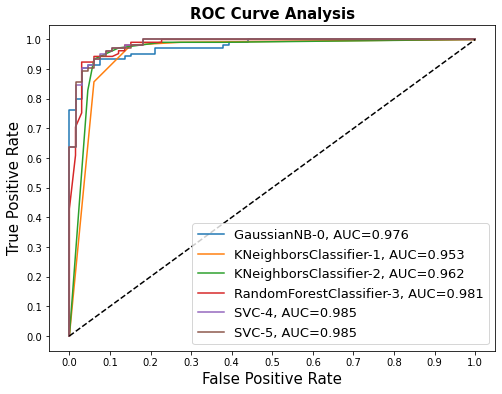

In [ ]:
# create a set of other models
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors=3),
               KNeighborsClassifier(n_neighbors=5), 
               RandomForestClassifier(random_state=2020),
               SVC(kernel="linear", C=0.025, probability=True),
               SVC(kernel="linear", C=0.01, probability=True)
              ]

results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','f1', 'mcc', 'confusion_matrix'])
import random
# train !
i = 0
for cls in classifiers:
    results = results.append(model_train_and_evaluate(cls, X_train, y_train, X_test, y_test, str(i)))
    i+=1

results.head()
print(results)
plot_roc_insame(results)

What about Deep models?

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 81.6387 - accuracy: 0.4829
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 62.7945 - accuracy: 0.5069
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 40.6591 - accuracy: 0.5144
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 25.5024 - accuracy: 0.6229
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 18.9727 - accuracy: 0.6382
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 9.2265 - accuracy: 0.7272
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 7.5658 - accuracy: 0.7818
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 4.6723 - accuracy: 0.8098
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 4.6250 - accuracy: 0.7628
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 2.5835 - accuracy: 0.8415
Epoc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


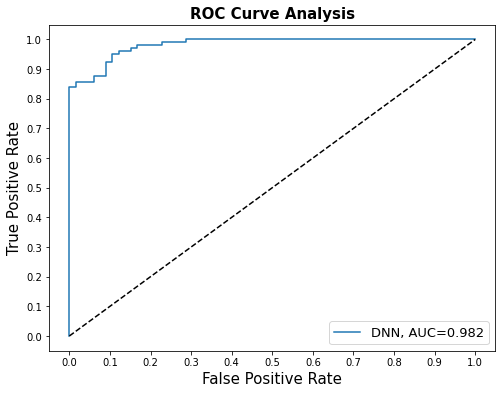

,fpr,tpr,auc,f1,mcc,confusion_matrix
classifiers,,,,,,
DNN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.23809523809523808, 0.2857142857142857,...",0.982107,0.940092,0.839653,"[[56, 10], [3, 102]]"


In [ ]:
def Deep_Model(activation= 'linear', neurons= 30, optimizer='Adam', input_size = 30):
    model = Sequential()
    # fully #1 
    model.add(Dense(neurons, input_dim= input_size, activation= activation))
    # fully #2 
    model.add(Dense(neurons, activation= activation))
    # dropout layer
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model


# ensure the dataset!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)

# create ref to keras model
clf = KerasClassifier(build_fn=Deep_Model, epochs= 100, batch_size=40, verbose= 1)

# train
clf.fit(X_train,y_train)

#test on samples! In this case whole test dataset
y_pred = clf.predict(X_test)

# get probabilities
yproba = clf.predict_proba(X_test)[::,1]

# extract metrics   tipically   y_true, y_pred
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
conf_m = confusion_matrix(y_test,ypredicted)
mcc = matthews_corrcoef(y_test, ypredicted)
f1 = f1_score(y_test,ypredicted)

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','f1', 'mcc', 'confusion_matrix'])
result_table = result_table.append({'classifiers':"DNN",
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc,
                                    'confusion_matrix': conf_m,
                                    'mcc':mcc,
                                    'f1': f1}, ignore_index=True)

print('AUC', auc)
print(classification_report(y_test,y_pred))
print(conf_m)

# plot roc curve!
plot_roc_insame(result_table)

result_table.head()

Multiclass and Image Classification! 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
    import pickle
    with open('/content/drive/My Drive/Workshop-SB-IEEE/cifar10.pickle', 'rb') as f:
        original_train_images, train_labels, original_test_images, test_labels = pickle.load(f)
except:
    
    from tensorflow.keras.datasets import cifar10
    (original_train_images,train_labels),(original_test_images,test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


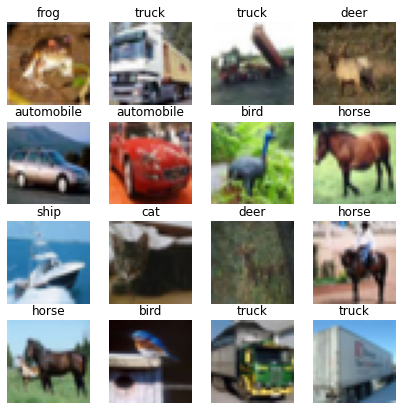

In [ ]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(7, 7))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(original_train_images[i])
    plt.title(class_names[int(train_labels[i])])
    plt.axis("off")

Normalização

In [ ]:
train_images = original_train_images / 255.0 
test_images = original_test_images / 255.0 

Criar um novo modelo convolucional usando o Keras.

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

Preparar optimizador e fazer o treino!

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam', 
              loss=SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# train!
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)


Epoch 1/20
1250/1250 [==============================] - 35s 4ms/step - loss: 1.8059 - accuracy: 0.3264 - val_loss: 1.3892 - val_accuracy: 0.5121
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3066 - accuracy: 0.5304 - val_loss: 1.1079 - val_accuracy: 0.6097
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1519 - accuracy: 0.5892 - val_loss: 1.0012 - val_accuracy: 0.6466
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0399 - accuracy: 0.6309 - val_loss: 0.9509 - val_accuracy: 0.6659
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9613 - accuracy: 0.6605 - val_loss: 0.8917 - val_accuracy: 0.6866
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8884 - accuracy: 0.6847 - val_loss: 0.8659 - val_accuracy: 0.6926
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8567 - accuracy: 0.6979 - val_loss: 0.8563 - val_accuracy

Podemos visualizar o progresso ao longo do treino

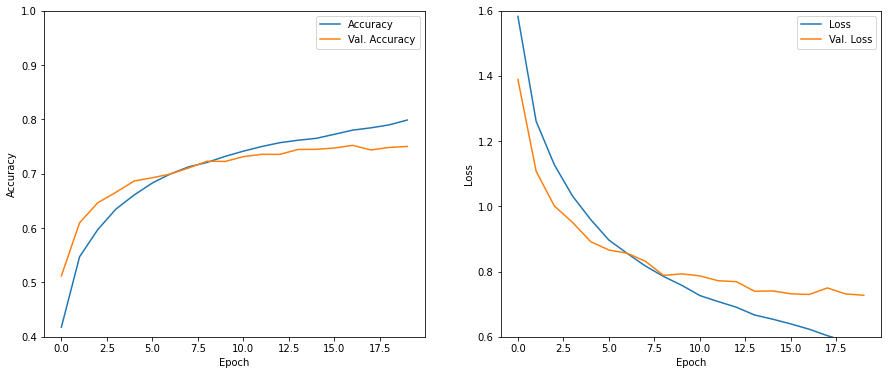

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Val. Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.6, 1.6])
plt.legend(loc='upper right')

Verificação dos métodos disponiveis para usar o modelo.


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.7407 - accuracy: 0.7460


In [ ]:
print(test_images[0:1].shape) # dar uma shape que o modelo aceite!
print(model.predict(test_images[0:1])) # testing only one!

(1, 32, 32, 3)
[[ 0.5313089  -1.7032071  -0.36235654  4.340602   -0.8488152   3.3154676
   0.38270903 -0.7919742  -2.8160138  -0.3794142 ]]
